In [12]:
from differences import ATTgt
from matplotlib import pyplot as plt
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
from panel_utilities import get_value_variable_names, convert_weekly_panel_to_biweekly_panel, prepare_df_for_DiD
from stats_utilities import select_controls, test_balance
from figure_utilities import aggregate_by_event_time_and_plot, aggregate_by_time_and_plot
import pandas as pd



# Store paths.
analysis='group_6_crimes_500m'
INPUT_DATA = "../../data/03_cleaned/crime_analysis_monthly.parquet"
OUTPUT_FIGURES = f"../../output/{analysis}/figures"
OUTPUT_TABLES = f"../../output/{analysis}/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_parquet(INPUT_DATA)

In [13]:
# Convert weekly panel to biweekly panel.
treatment_date_variable = 'latest_docket_month'
df = df.dropna(subset=treatment_date_variable)
# df = convert_weekly_panel_to_biweekly_panel(df, treatment_date_variable, analysis)

# Generate value vars list and month to int dictionaries.
weekly_value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = get_value_variable_names(df, analysis)

In [14]:
covariates_exploration_df = select_controls(df=df, analysis=analysis,
                                            treatment_date_variable=treatment_date_variable,
                                            output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                             Change in Crime Incidents, April 2019-March 2020   
                                                 \emph{Independent Variable}                                                                    
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_6_crimes_500m                                      2.000613e-52   
                                                 pre_treatment_change_in_group_6_crimes_500m                                    1.010471e-312   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                              4.472056e-03   
                                                 job_density_2013                                                                2.501626e-20   
                                                 med_hhinc2016                                                                   9.053910e-01   
                                                 poor_share2010                                                                  3.087996e-03   
                                                 popdensity2010                                                                  3.762672e-08   
Panel C: Case Initiation                         for_cause                                                                       5.487205e-02   
                                                 no_cause                                                                        9.553721e-01   
                                                 non_payment                                                                     3.047914e-02   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                                        4.389985e-01   
                                                 hasAttyP                                                                        1.436907e-01   
                                                 isEntityD                                                                       2.268194e-01   
                                                 isEntityP                                                                       3.499813e-04   

                                                                                                               
                                                                                             Treated Property  
                                                 \emph{Independent Variable}                                   
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_6_crimes_500m      5.529022e-01  
                                                 pre_treatment_change_in_group_6_crimes_500m     6.963938e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                              6.300067e-01  
                                                 job_density_2013                                6.967381e-01  
                                                 med_hhinc2016                                   2.713150e-02  
                                                 poor_share2010                                  3.442531e-03  
                                                 popdensity2010                                  8.582592e-01  
Panel C: Case Initiation                         for_cause                                       4.074914e-03  
                                                 no_cause                                        2.626528e-02  
                                                 non_payment                                     4.274988e-07  
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                        1.222082e-08  
                                                 hasAttyP                                

In [15]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                              Cases Won by Plaintiff   
Panel A Total Group 6 Incidents, 2017                     152.491099   
        $\Delta$ Group 6 Incidents, 2017-2019             -11.305759   
Panel B Bachelor's degree, 2010                             0.316407   
        Job density, 2013                               16161.032515   
        Poverty rate, 2010                                  0.279638   
        Population density, 2010                        23320.185868   
Panel C Filing for nonpayment                               0.716230   
Panel D Plaintiff is entity                                 0.808377   

                                              Difference in Cases Won by Defendant  \
                                                                        Unweighted   
Panel A Total Group 6 Incidents, 2017                                    -4.644794   
        $\Delta$ Group 6 Incidents, 2017-2019                            -1.041357   
Panel B Bachelor's degree, 2010                                           0.005248   
        Job density, 2013                                              -845.940269   
        Poverty rate, 2010                                               -0.022478   
        Population density, 2010                                       -128.009157   
Panel C Filing for nonpayment                                            -0.107994   
Panel D Plaintiff is entity                                              -0.083794   

                                                                          \
                                                   \emph{p}     Weighted   
Panel A Total Group 6 Incidents, 2017          5.529022e-01    -9.712856   
        $\Delta$ Group 6 Incidents, 2017-2019  6.963938e-01     0.093219   
Panel B Bachelor's degree, 2010                6.300067e-01    -0.013419   
        Job density, 2013                      6.967381e-01 -1189.375523   
        Poverty rate, 2010                     3.442531e-03    -0.024127   
        Population density, 2010               8.582592e-01 -1221.934226   
Panel C Filing for nonpayment                  4.274988e-07    -0.084607   
Panel D Plaintiff is entity                    4.277201e-06    -0.078258   

                                                         
                                               \emph{p}  
Panel A Total Group 6 Incidents, 2017          0.201186  
        $\Delta$ Group 6 Incidents, 2017-2019  0.971821  
Panel B Bachelor's degree, 2010                0.101794  
        Job density, 2013                      0.583925  
        Poverty rate, 2010                     0.001675  
        Population density, 2010               0.035582  
Panel C Filing for nonpayment                  0.000013  
Panel D Plaintiff is entity                    0.000016

In [16]:
# Generate indicators for missing data.

# missing_indicators = add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = df.reset_index()
df = prepare_df_for_DiD(df=df,
                        analysis=analysis,
                        treatment_date_variable=treatment_date_variable,
                        pre_treatment_covariates=pre_treatment_covariates,
                        missing_indicators=[],
                        value_vars=weekly_value_vars_crime,
                        period_to_int_dictionary=month_to_int_dictionary)

In [17]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_date_variable, freq='2W', base_period='universal')
result = att_gt.fit(formula=analysis, control_group='not_yet_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 1104/1104 [00:11<00:00, 97.93it/s] 


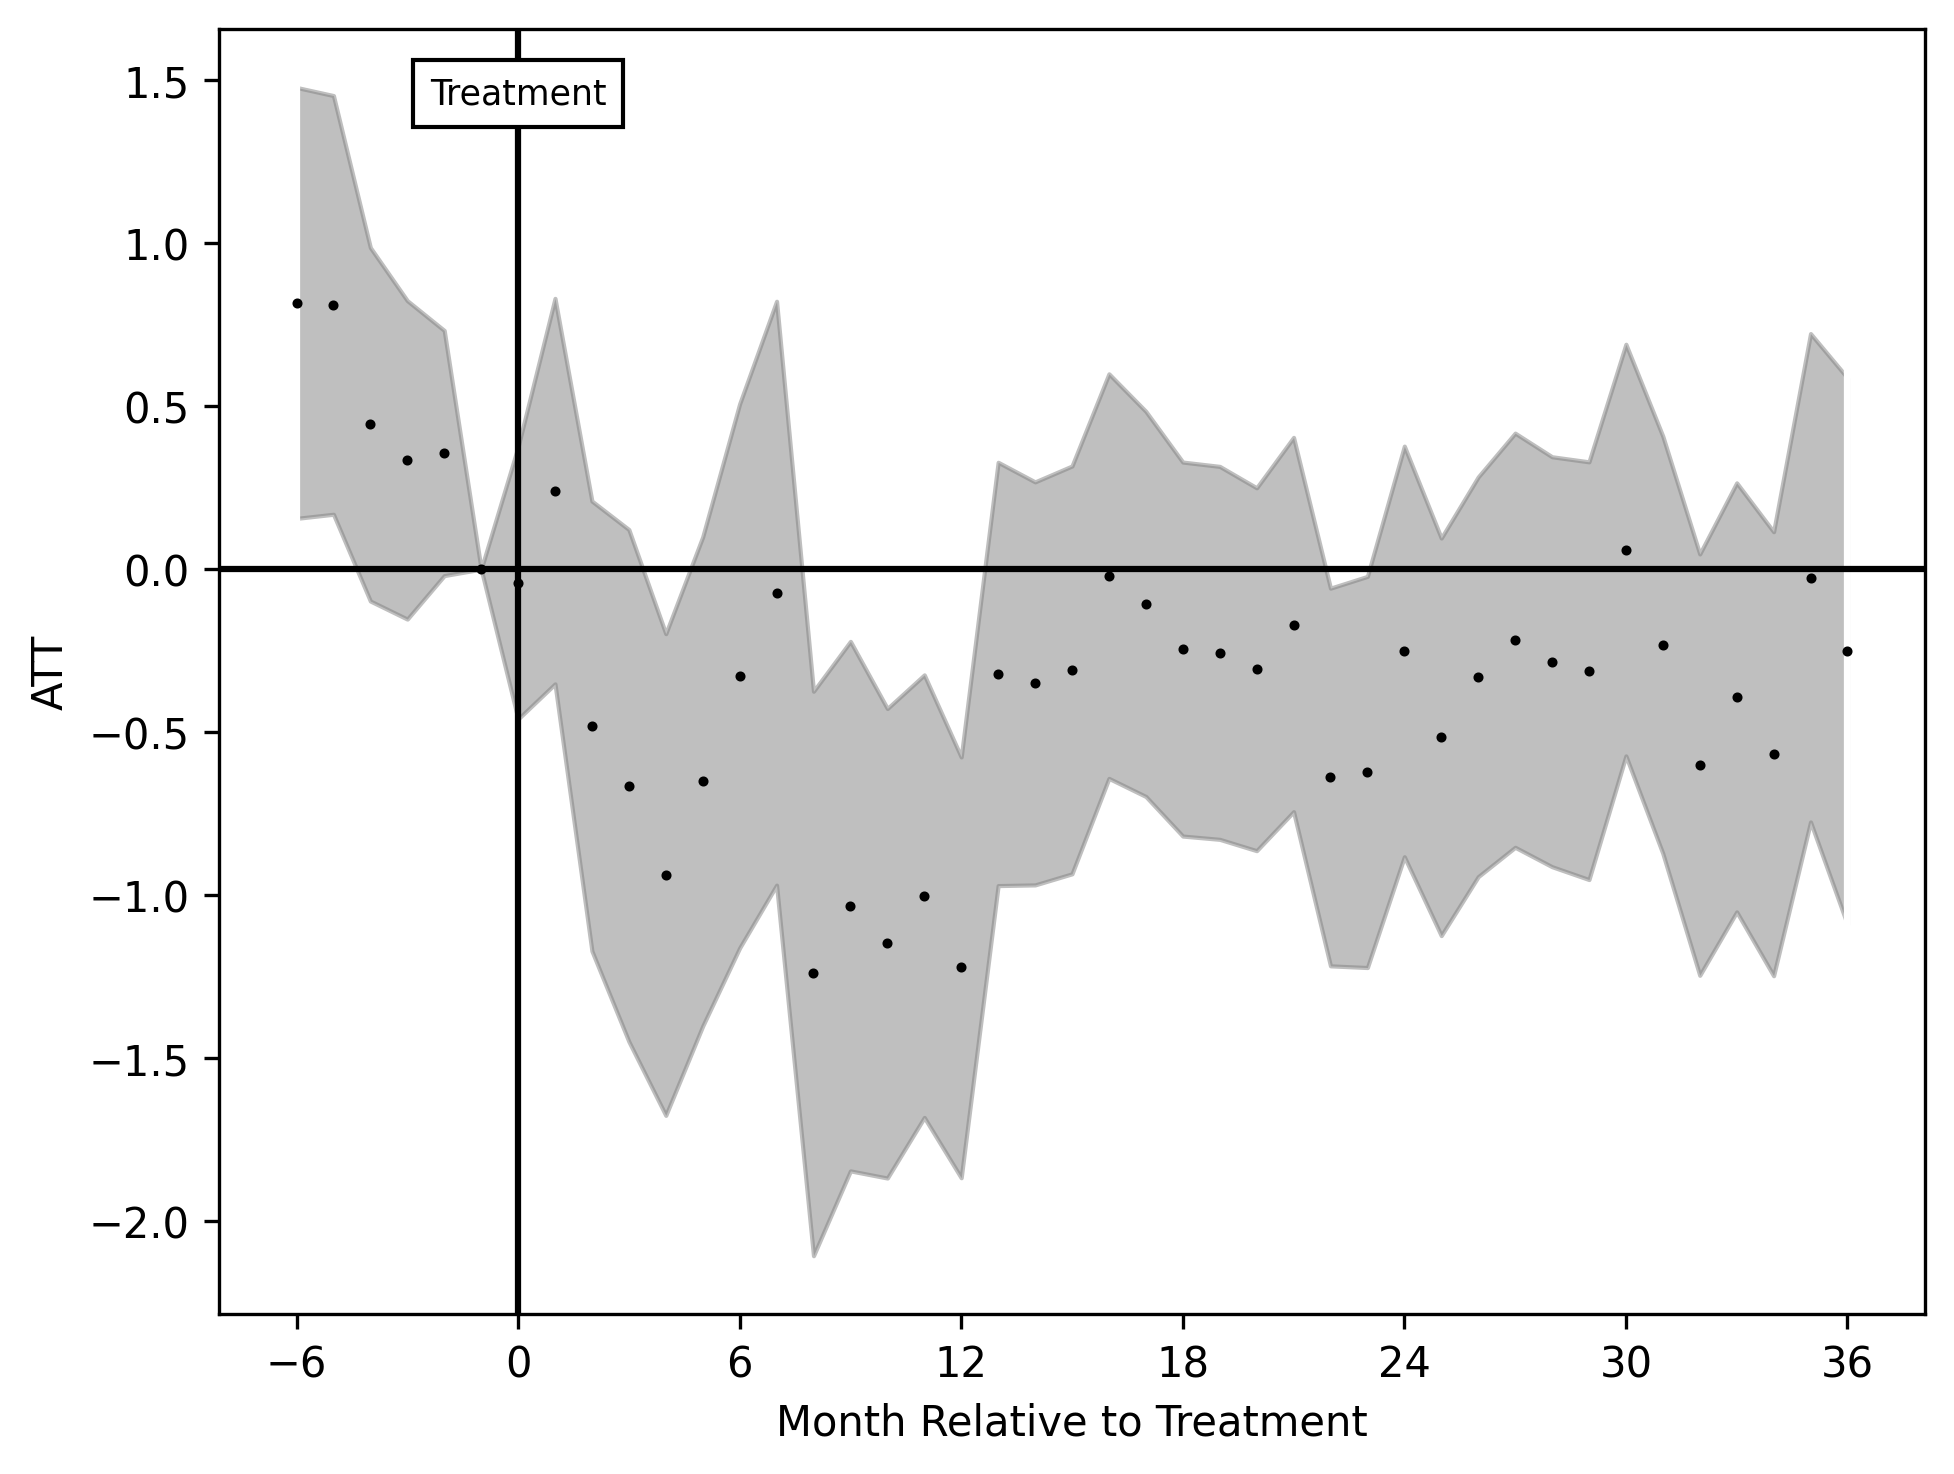

In [18]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-6, end_period=36,
                                 title="",
                                 treatment_month_variable=treatment_date_variable, df=df)

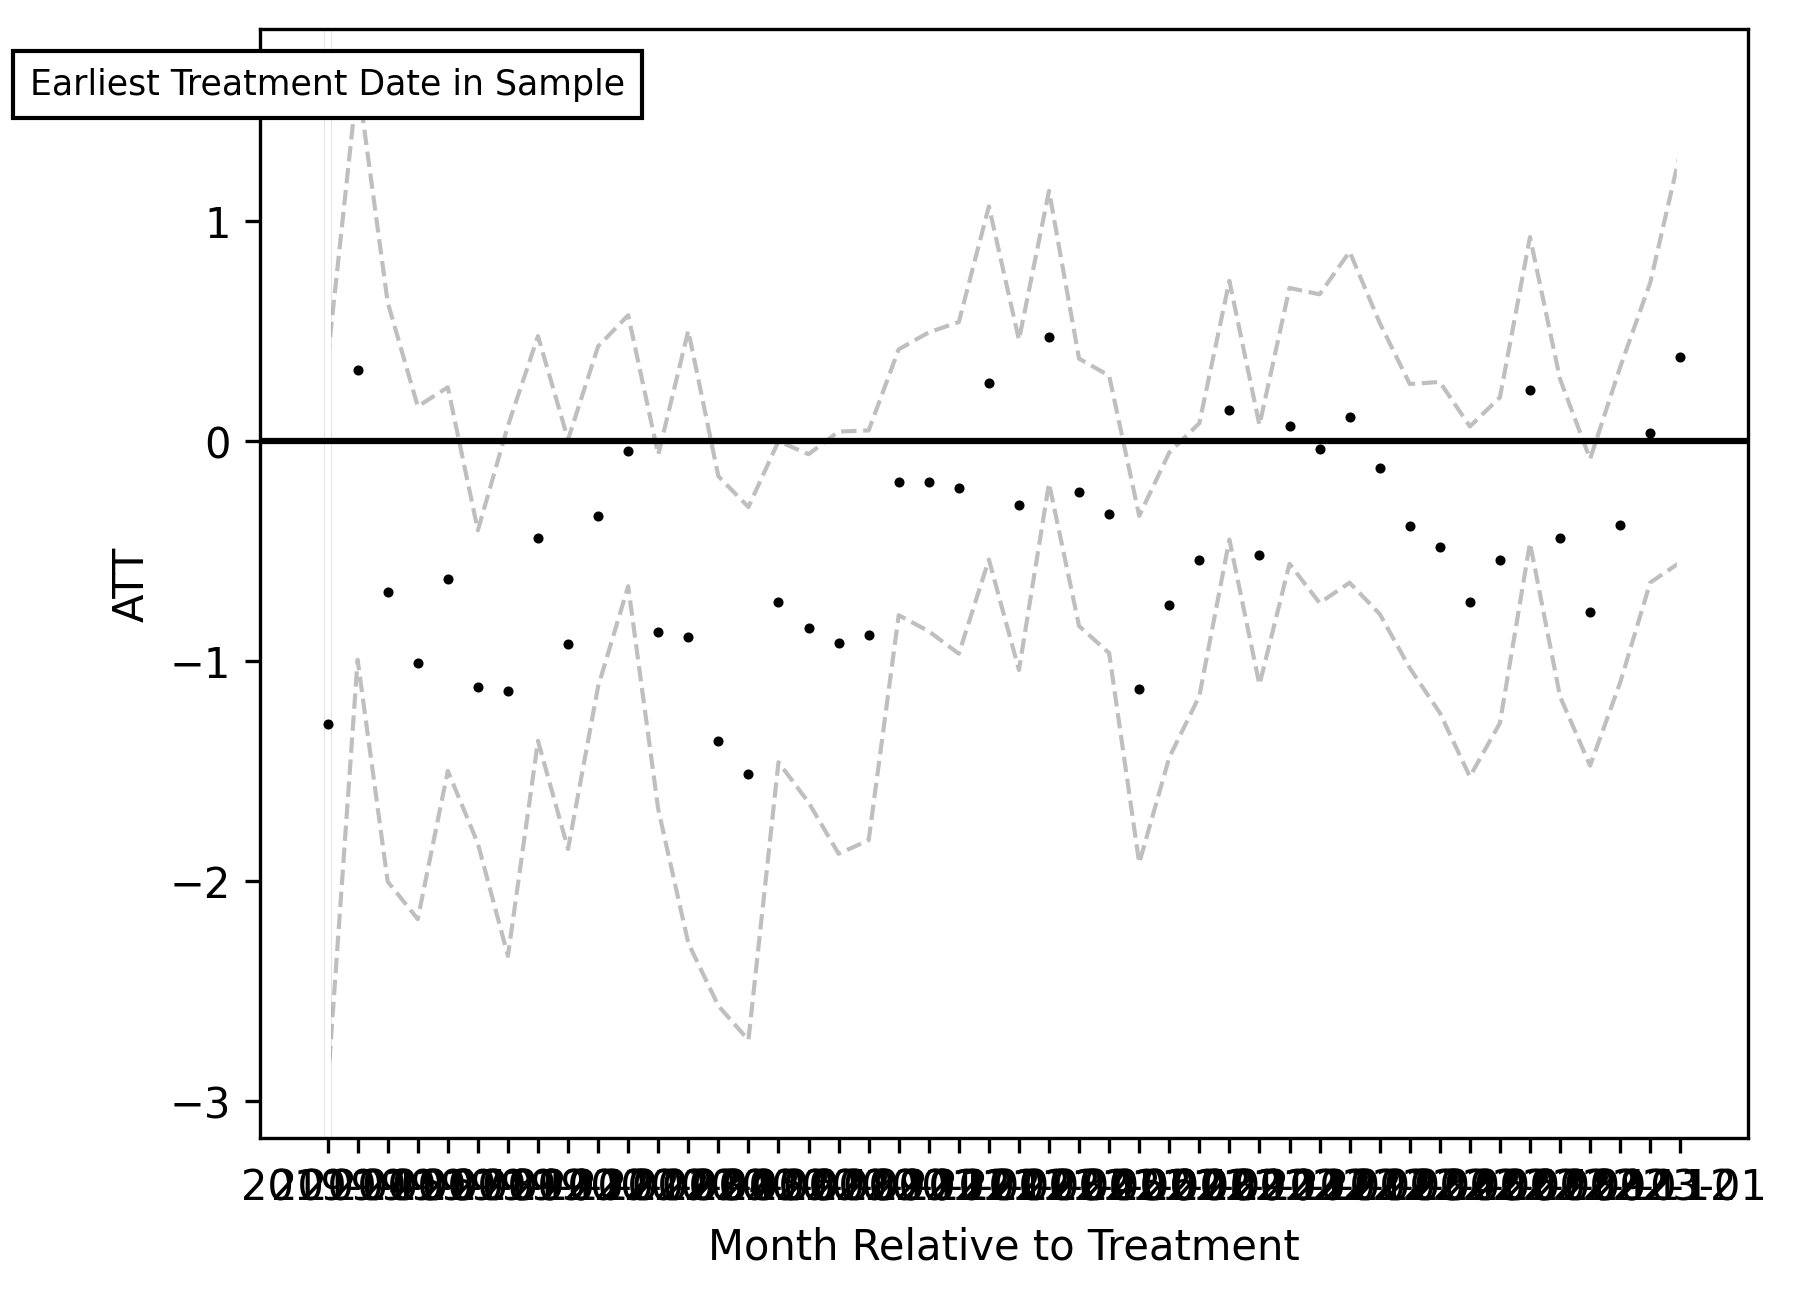

In [19]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="")

In [20]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_date_variable, freq='M', base_period='universal')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='not_yet_treated', n_jobs=-1, progress_bar=True)

Computing ATTgt [workers=10]    4%|▊                   | 46/1104 [00:04<00:36, 28.85it/s] /Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
Computing ATTgt [workers=10]    5%|▉                   | 54/1104 [00:04<00:29, 36.00it/s]/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/differences/did/att_if.py:27: RuntimeWarning: divide by zero encountered in divide
  w_cont = weights * ps_fit * ((1 - treated) / (1 - ps_fit))
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, wh

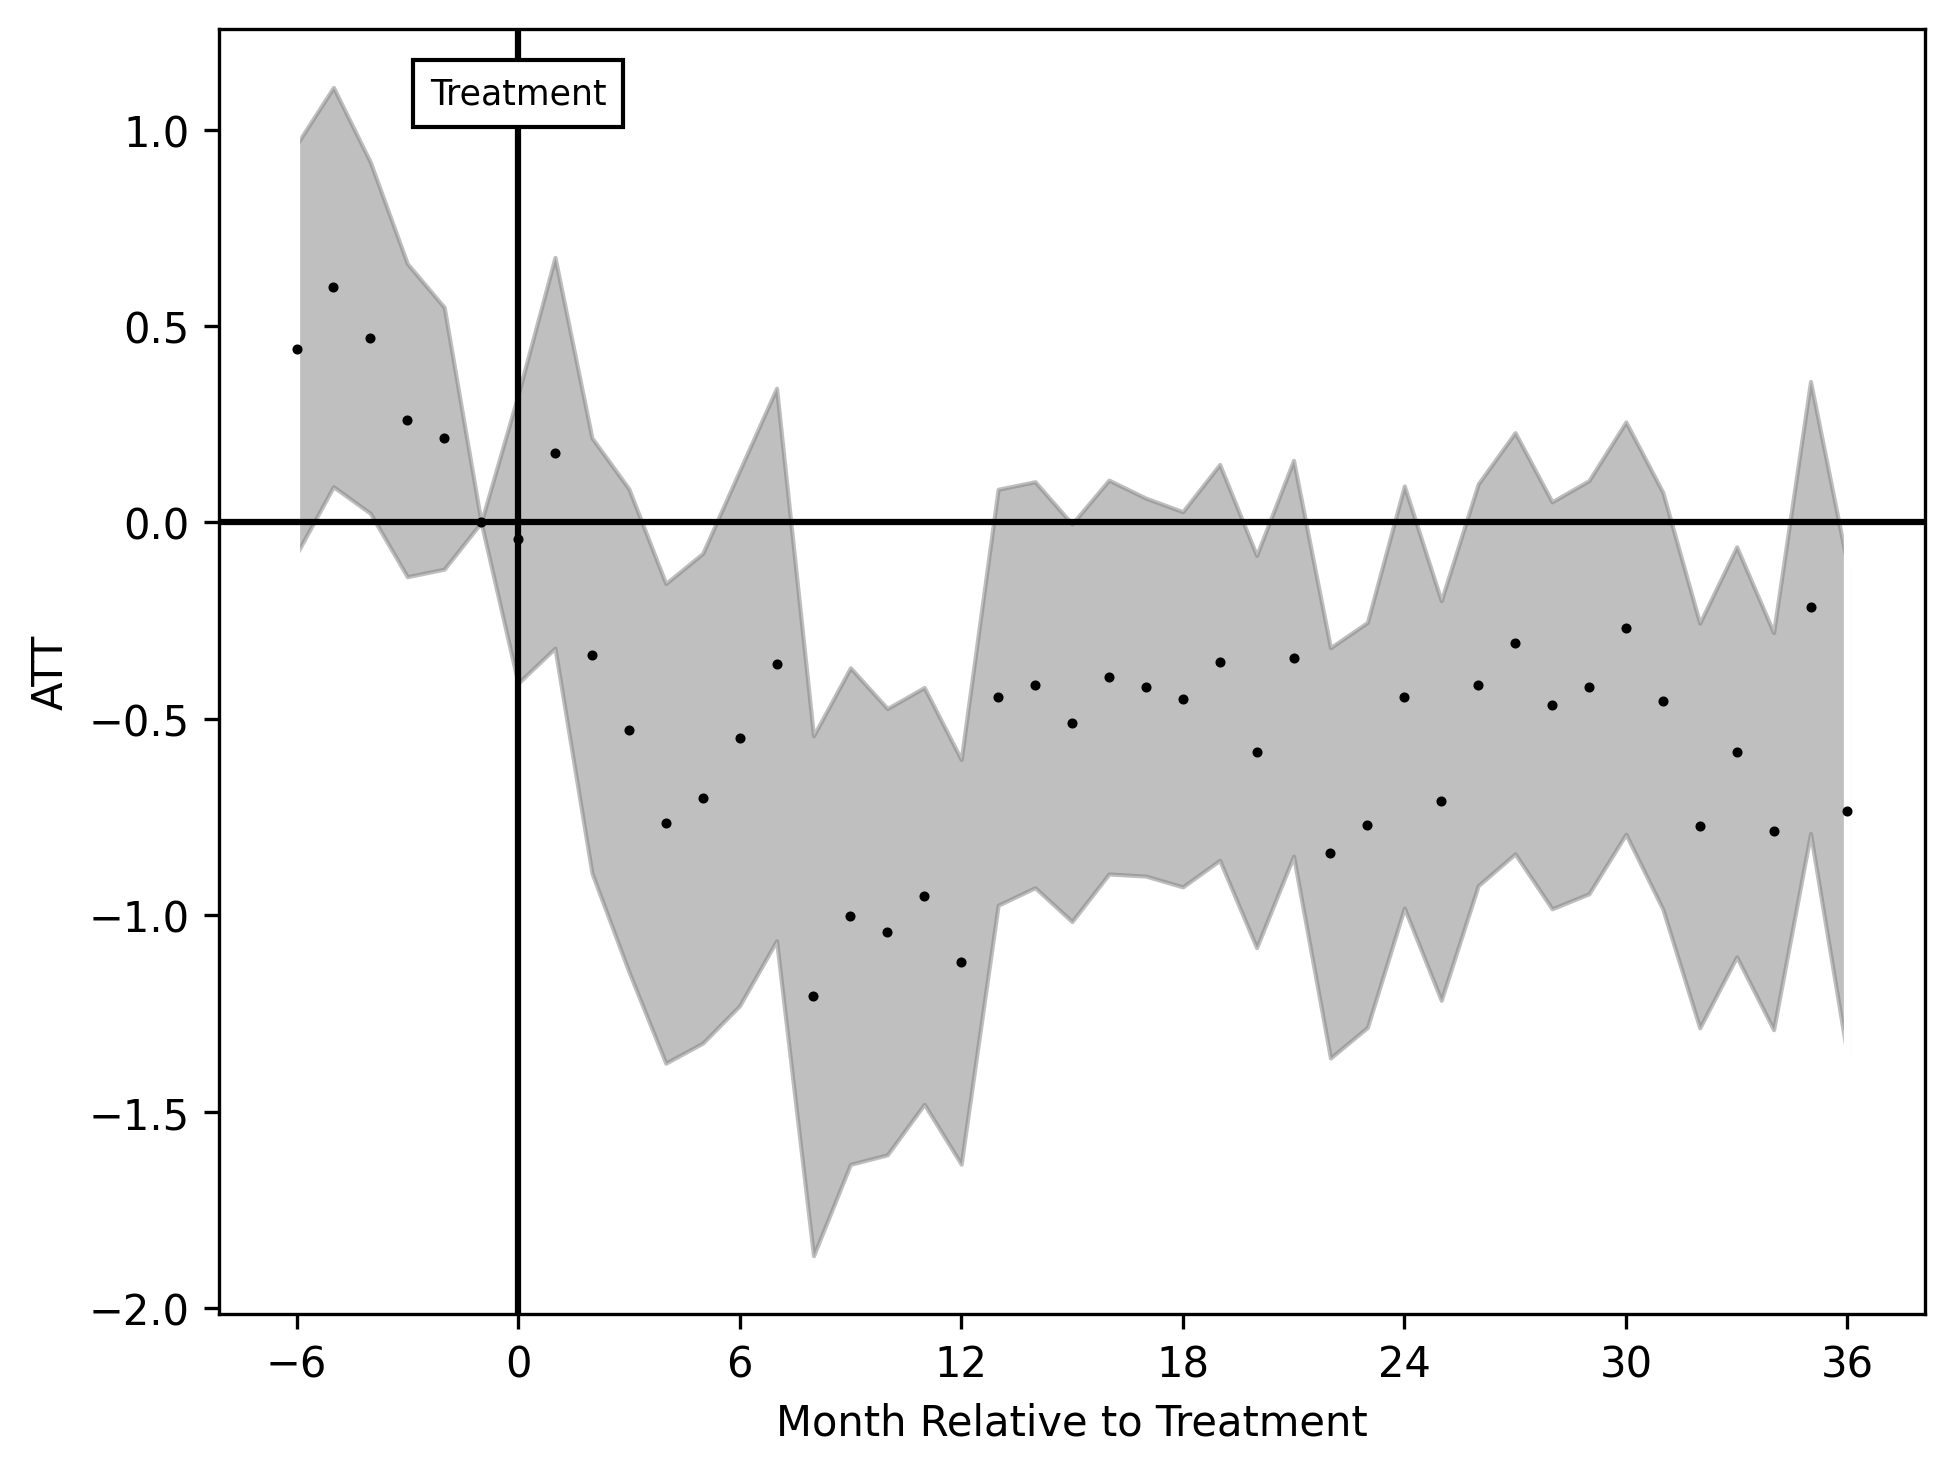

In [21]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-6,
                                 end_period=36,
                                 title="",
                                 treatment_month_variable=treatment_date_variable, df=df)

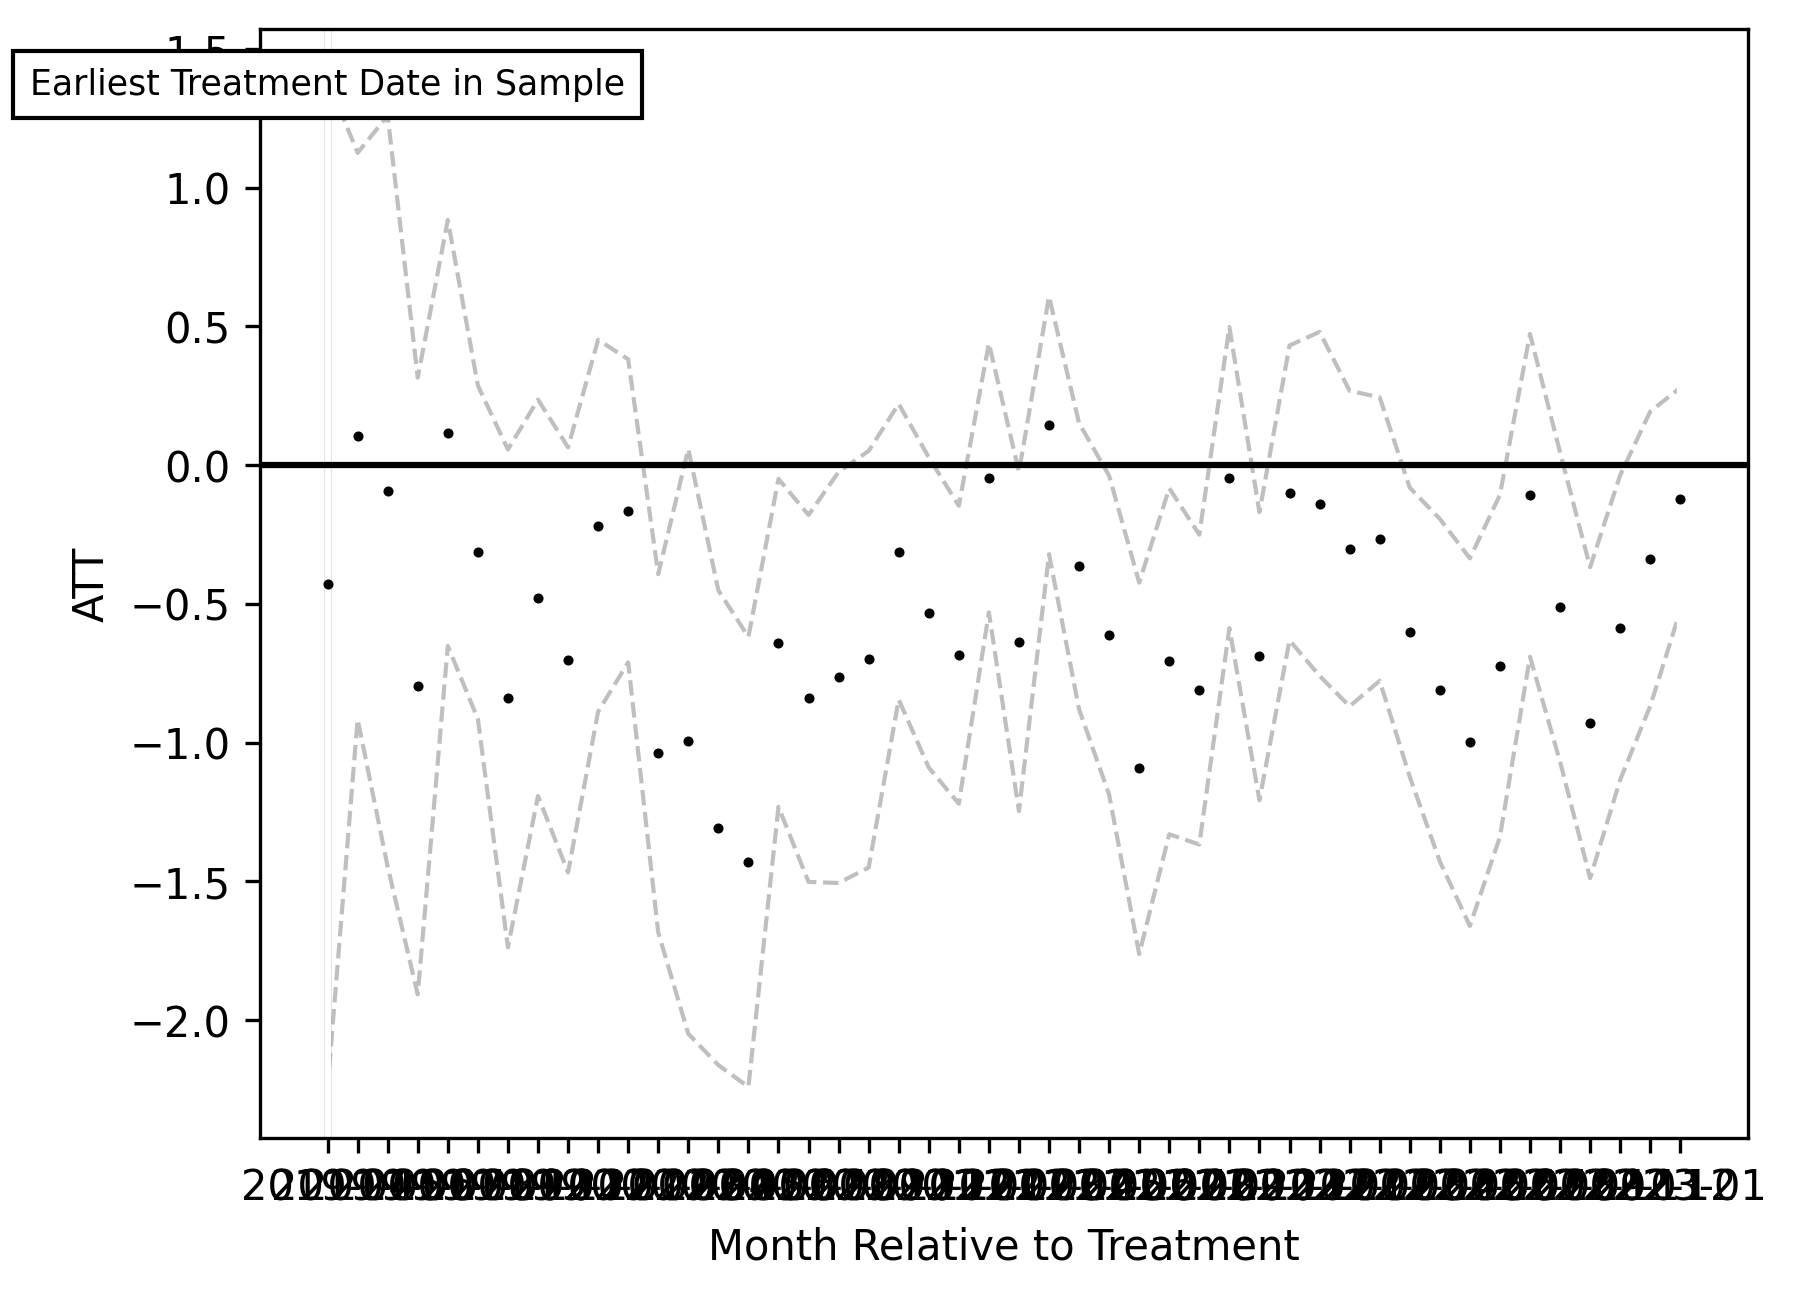

In [22]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="")